In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
from Lux.model.conf import *


In [10]:
model_df = pd.read_pickle(f"results/Model_vars{LOG_NAME_SUFFIX}.pkl")
model_df = model_df.rolling(5, min_periods=1).mean()

model_df.head()

,tech_optimists,tech_pessimists,price,nf,technical_fraction,slope
0,10.000000,10.00,9.990,180.000000,0.100000,0.000000
1,10.000000,10.00,9.990,180.000000,0.100000,-0.166667
2,10.333333,10.00,9.990,179.666667,0.101667,-0.194444
3,10.500000,10.25,9.990,179.250000,0.103750,-0.195833
4,10.400000,10.40,9.992,179.200000,0.104000,-0.190000


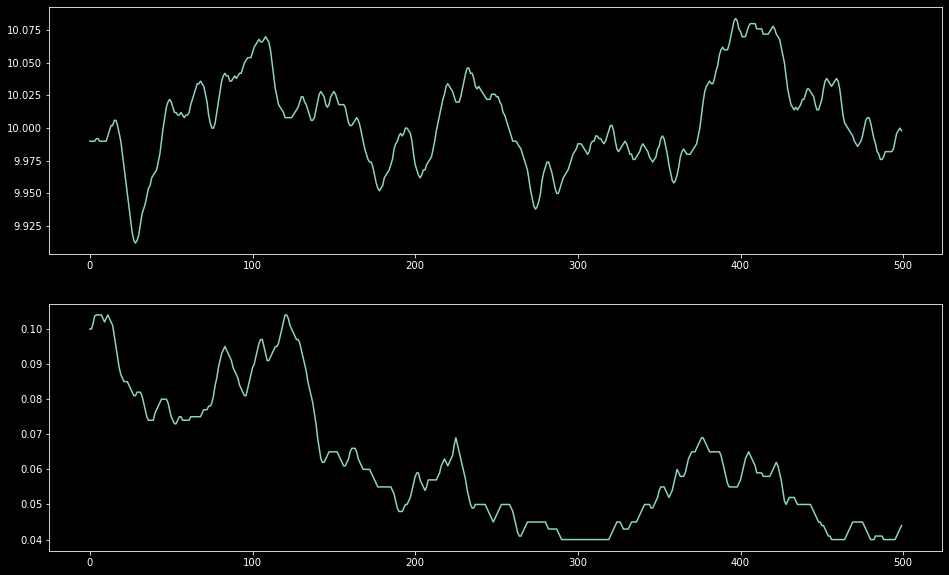

In [11]:
fig , ax = plt.subplots(2,1, figsize=(16, 10))

ax[0].plot(model_df.price)

ax[1].plot(model_df.technical_fraction)


In [12]:
edt = (model_df.tech_optimists - model_df.tech_pessimists) * tc  # excess technical demand
edf = model_df.nf * gamma * (pf - model_df.price)

model_df["edt"] = edt
model_df["edf"] = edf
model_df["ed"]  = edt + edf

model_df.head()

,tech_optimists,tech_pessimists,price,nf,technical_fraction,slope,edt,edf,ed
0,10.000000,10.00,9.990,180.000000,0.100000,0.000000,0.000000,0.018000,0.018000
1,10.000000,10.00,9.990,180.000000,0.100000,-0.166667,0.000000,0.018000,0.018000
2,10.333333,10.00,9.990,179.666667,0.101667,-0.194444,0.006667,0.017967,0.024633
3,10.500000,10.25,9.990,179.250000,0.103750,-0.195833,0.005000,0.017925,0.022925
4,10.400000,10.40,9.992,179.200000,0.104000,-0.190000,0.000000,0.014336,0.014336


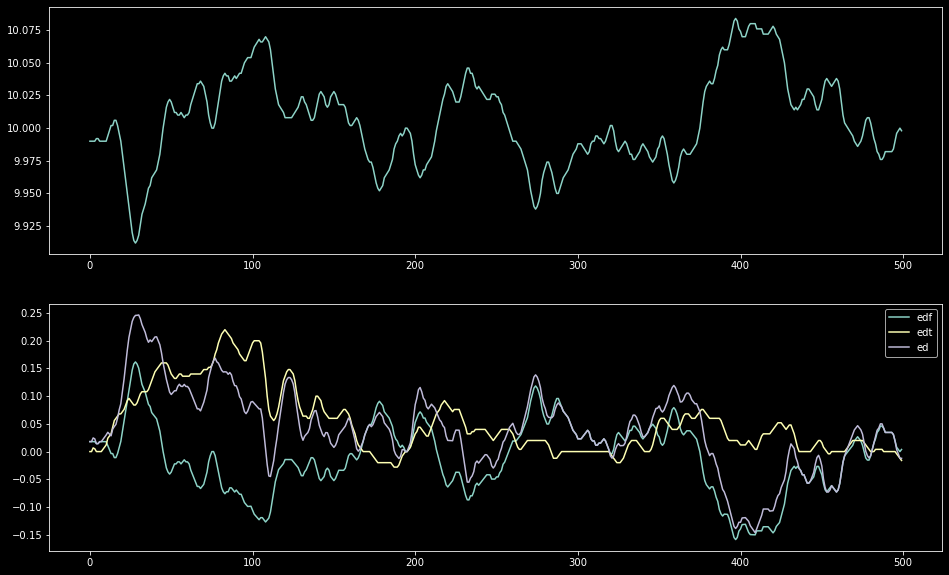

In [13]:
fig , ax = plt.subplots(2,1, figsize=(16, 10))

ax[0].plot(model_df.price)
ax[1].plot(model_df.edf, label="edf")
ax[1].plot(model_df.edt, label="edt")
ax[1].plot(model_df.ed, label="ed")
ax[1].legend()

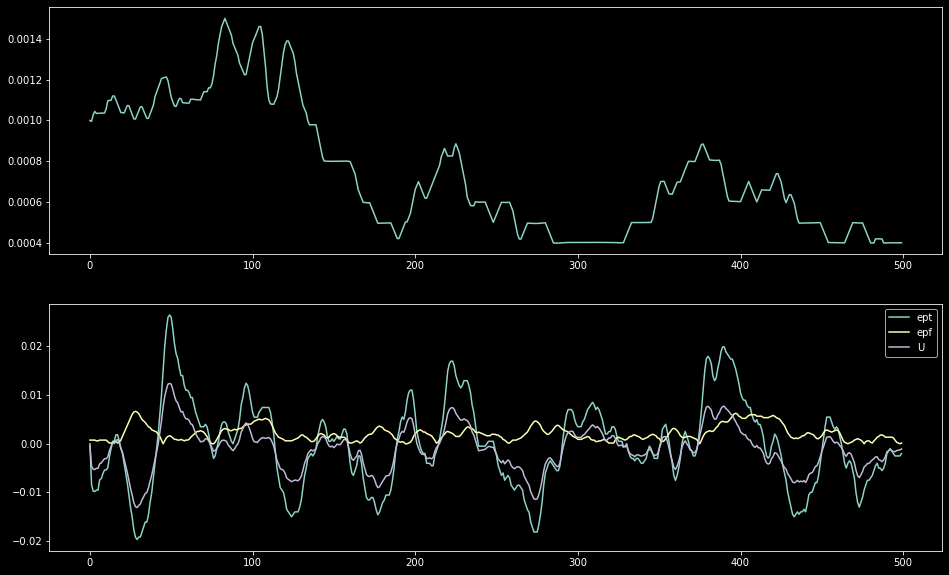

In [14]:
ept = (r + model_df.slope / v2) / model_df.price - R
epf = s * abs((model_df.price - pf) / model_df.price)

U = a3 * (ept - epf)
p_transition = v2 * model_df.tech_optimists / N * np.exp(U) * DT

fig, ax = plt.subplots(2, 1, figsize=(16,10))
ax[0].plot(p_transition)
ax[1].plot(ept, label="ept")
ax[1].plot(epf, label="epf")
ax[1].plot(U, label="U")
ax[1].legend()